Saving bajfinance_data.csv.csv to bajfinance_data.csv (4).csv
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 2.3944e-04 - val_loss: 0.0011
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 6.1813e-06 - val_loss: 0.0013
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 6.4150e-06 - val_loss: 6.9600e-04
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 6.2176e-06 - val_loss: 0.0011
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 5.0156e-06 - val_loss: 7.5737e-04
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 4.7984e-06 - val_loss: 7.5241e-04
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 4.4688e-06 - val_loss: 5.8125e-04
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 4.6039e-06 - val_loss: 4.5381e-04
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 4.1280e-06 - val_loss: 4.3387e-04
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 4.0176e-06 - val_loss: 3.8036e-04
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 3.9710

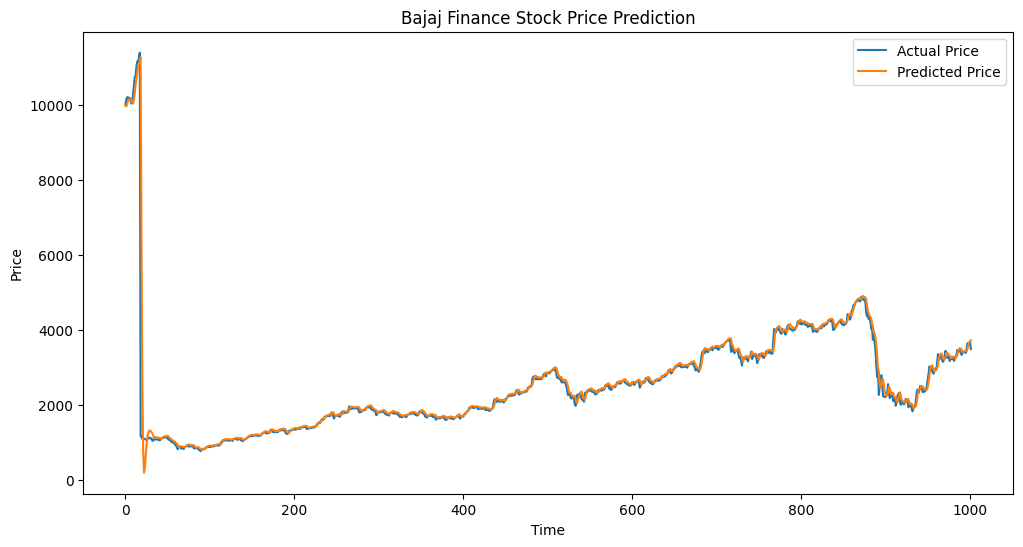

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from google.colab import files
uploaded = files.upload()

# Load data
df = pd.read_csv("/content/bajfinance_data.csv (2).csv")  # Replace with your CSV
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]  # Use only 'Close' price for prediction

# Scale data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_len):
    x, y = [], []
    for i in range(len(data) - seq_len):
        x.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(x), np.array(y)

sequence_length = 60
X, y = create_sequences(df_scaled, sequence_length)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Predict and plot
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.legend()
plt.title("Bajaj Finance Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()